In [ ]:
%pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.5 MB/s eta 0:00:00


Using cache found in /root/.cache/torch/hub/isl-org_ZoeDepth_main


img_size [384, 512]


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


Params passed to Resize transform:
	width:  512
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_NK.pt
Loaded successfully


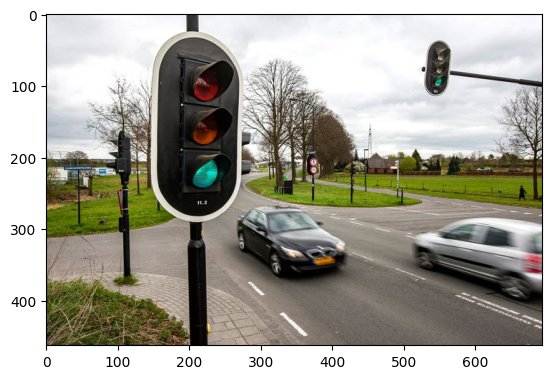

Saved raw depth to /content/drive/MyDrive/ZOE probeersels/Test.png


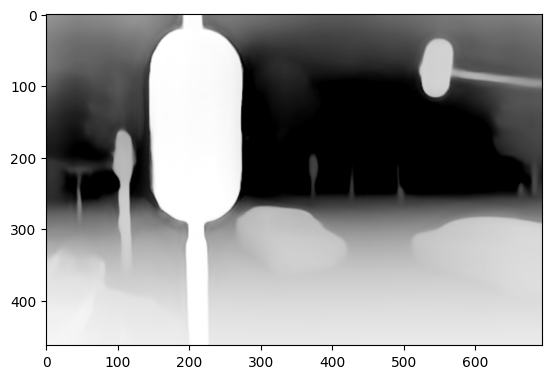

Pixel color at (0.538207, 0.451442): (64, 64, 64, 255)
traffic light
far
Pixel color at (0.96101, 0.539736): (62, 62, 62, 255)
person
far
Pixel color at (0.790175, 0.162787): (209, 209, 209, 255)
traffic light
close
Pixel color at (0.866138, 0.737622): (210, 210, 210, 255)
car
close
Pixel color at (0.495028, 0.685281): (204, 204, 204, 255)
car
close
Pixel color at (0.305333, 0.341926): (252, 252, 252, 255)
traffic light
close


In [ ]:

import torch
import matplotlib.pyplot as plt
from PIL import Image

#torch.hub.help("intel-isl/MiDaS", "DPT_BEiT_L_384", force_reload=True)

# Zoe_K
#model_zoe_k = torch.hub.load(repo, "ZoeD_K", pretrained=True)

# Zoe_NK
model_zoe_nk = torch.hub.load(repo, "ZoeD_NK", pretrained=True)

##### sample prediction
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
zoe = model_zoe_nk.to(DEVICE)

# Local file
image = Image.open("/content/drive/MyDrive/ZOE probeersels/stoplicht_test_foto_2.jpeg").convert("RGB")  # load
depth_numpy = zoe.infer_pil(image)  # as numpy
plt.imshow(image)
plt.show()

depth_pil = zoe.infer_pil(image, output_type="pil")  # as 16-bit PIL Image

depth_tensor = zoe.infer_pil(image, output_type="tensor")  # as torch tensor

# Tensor 
from zoedepth.utils.misc import pil_to_batched_tensor
X = pil_to_batched_tensor(image).to(DEVICE)
depth_tensor = zoe.infer(X)

#image = get_image_from_url(URL)  # fetch
depth = zoe.infer_pil(image)

# Save raw
from zoedepth.utils.misc import save_raw_16bit
fpath = "/content/drive/MyDrive/ZOE probeersels/Test.png"
save_raw_16bit(depth, fpath)

# Colorize output
from zoedepth.utils.misc import colorize

colored = colorize(depth)

# save colored output
Image.fromarray(colored).save("/content/drive/MyDrive/ZOE probeersels/Test_colored.png")

# display image
image = Image.open("/content/drive/MyDrive/ZOE probeersels/Test_colored.png")
plt.imshow(image)
plt.show()


from PIL import Image
import csv

# Load image
img = Image.open("/content/drive/MyDrive/ZOE probeersels/Test_colored.png")
width, height = img.size

# Open CSV file
with open("/content/drive/MyDrive/ZOE probeersels/dataframe_voor_ivan.csv", "r") as csvfile:
    reader = csv.DictReader(csvfile)

    # Iterate through each row in the CSV file
    for row in reader:
        # Retrieve normalized x and y coordinates from CSV file
        x_norm = float(row["x_midden"])
        y_norm = float(row["y_midden"])

        # Get the actual pixel coordinates by multiplying with image dimensions
        x = int(x_norm * width)
        y = int(y_norm * height)

        # Get the color of the pixel at the specified coordinate
        pixel_color = img.getpixel((x, y))

        # Print the pixel color
        print(f"Pixel color at ({x_norm}, {y_norm}): {pixel_color}")

        classes = row["class_naam"]
        print(classes)

        closeness = pixel_color[0]
        if closeness < 200: 
          print("far")
        else: 
          print("close")